Bitcoin price analyis 


In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pit
from matplotlib.offsetbox import AnchoredText
import datetime as dt
import itertools
import matplotlib.dates as mdates
import seaborn as sns

btc=pd.read_csv( "https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv")
btc.head(10)
 



,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0
5,2/22/2010,0.0,2098150.0,0.0,0.0,0.0,0.000384,0,1.0,0.0,...,65.214056,0.0,262,261,42361,261,261,32350.00,19551.0,0.0
6,2/23/2010,0.0,2110700.0,0.0,0.0,0.0,0.000216,0,1.0,0.0,...,25100.000000,0.0,252,252,42613,252,252,12600.00,50.0,0.0
7,2/24/2010,0.0,2120200.0,0.0,0.0,0.0,0.000282,0,1.0,0.0,...,179.245283,0.0,195,196,42809,196,196,14800.00,5300.0,0.0
8,2/25/2010,0.0,2127600.0,0.0,0.0,0.0,0.000227,0,1.0,0.0,...,1057.142857,0.0,150,150,42959,150,150,8100.00,700.0,0.0
9,2/26/2010,0.0,2136100.0,0.0,0.0,0.0,0.000319,0,1.0,0.0,...,64.582059,0.0,176,176,43135,176,176,29349.00,13162.0,0.0


In [2]:



btc['year']=pd.DatetimeIndex(btc["Date"]).year
btc.index=btc["year"]
btc.tail(50)


 

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,year
year,,,,,,,,,,,,,,,,,,,,,
2017,12/13/2017,16808.36667,16739462.5,2.810000e+11,2.027551e+09,146160.7015,1.057065,0,2282.682796,11.525000,...,115.965966,958476,424579,281638496,407341,259062,3267550.708,277147.4477,4.658396e+09,2017
2017,12/14/2017,16678.89200,16741775.0,2.790000e+11,6.102071e+08,146353.4414,1.041837,0,2652.129730,8.233333,...,100.523565,1072861,490644,282129140,470650,225507,2943542.647,215114.7697,3.587876e+09,2017
2017,12/15/2017,17771.90000,16743887.5,2.980000e+11,2.066395e+09,146532.2330,1.057939,0,2400.449704,13.150000,...,118.509879,942513,405676,282534816,389126,256456,2756649.280,237114.5897,4.213977e+09,2017
2017,12/16/2017,19498.68333,16746025.0,3.270000e+11,1.636510e+09,146712.9088,1.056584,0,2129.953216,13.050000,...,143.019791,819304,364222,282899038,349526,230740,2356102.923,183692.7238,3.581766e+09,2017
2017,12/17/2017,19289.78500,16748337.5,3.230000e+11,1.641067e+09,146905.5076,1.041074,0,2118.432432,11.600000,...,140.175358,877464,391910,283290948,375878,234246,2389062.955,262597.6285,5.065452e+09,2017
2017,12/18/2017,18961.85667,16750612.5,3.180000e+11,2.021141e+09,147095.1580,1.042035,0,2166.148352,11.450000,...,137.660691,922523,394239,283685187,376724,233159,3005751.300,257014.9995,4.873482e+09,2017
2017,12/19/2017,17737.11167,16752362.5,2.970000e+11,2.215330e+09,147243.5803,1.060159,0,2704.442857,9.900000,...,113.021631,887697,378622,284063809,362550,203360,1984897.730,212627.8446,3.771404e+09,2017
2017,12/20/2017,16026.27167,16754062.5,2.690000e+11,2.752776e+09,147389.4811,1.072800,0,2722.625000,11.250000,...,113.034509,853863,370277,284434086,352242,238891,2227875.178,321480.9061,5.152140e+09,2017
2017,12/21/2017,16047.51000,16755712.5,2.690000e+11,1.989092e+09,147526.5885,1.038692,0,2541.530303,10.850000,...,132.919816,840739,335482,284769568,318502,188722,1791086.429,228091.5617,3.660302e+09,2017


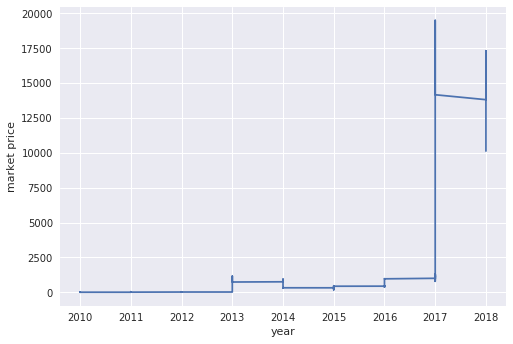

In [3]:
import matplotlib.pyplot as pit
a = pit.plot(btc['year'],btc['btc_market_price'])
pit.xlabel('year')
pit.ylabel('market price')
pit.show(a)


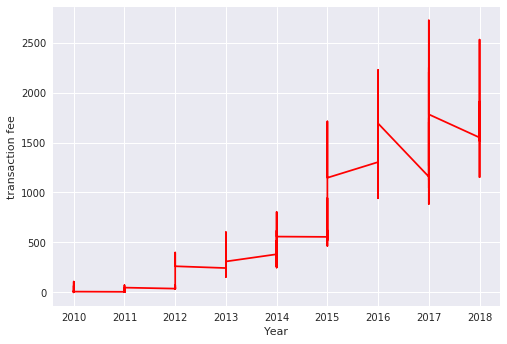

In [11]:
pit.plot(btc['year'],btc['btc_n_transactions_per_block'],color='red')

pit.ylabel('transaction fee')
pit.xlabel('Year')

pit.show()


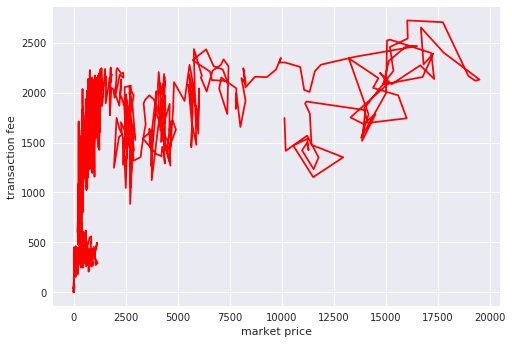

In [14]:
pit.plot(btc['btc_market_price'],btc['btc_n_transactions_per_block'],color='red')

pit.ylabel('transaction fee')
pit.xlabel('market price')

pit.show()

In [15]:
 
from sklearn.metrics import mean_squared_error
lm = sm.ols(formula='btc_market_price ~ btc_n_transactions_excluding_chains_longer_than_100', data=btc).fit()
y_hat = lm.predict(btc[['btc_n_transactions_excluding_chains_longer_than_100']])
mse_lm = mean_squared_error(y_hat, btc[['btc_n_transactions_excluding_chains_longer_than_100']])
print("MSE:", mean_squared_error(y_hat, btc[['btc_market_price']]))


NameError: name 'sm' is not defined